In [22]:
# Importing all libraries that will be used
from collections import deque
import heapq
from typing import Tuple, Callable, List, Any, Set, Deque, Dict

In [13]:
type State = Tuple[Tuple[int, ...], ...]
INF = 10**9

def bfs(s: State, t: State, sucessors: Callable[[State], List[State]]) -> List[State]:
    q: Deque[State] = deque()
    vis: Set[State] = set()
    par: Dict[State, State] = dict()

    # Handle start
    q.append(s)
    vis.add(s)
    par[s] = None

    while q:
        # Let's go level by level
        n = len(q)
        found = False
        while n:
            curr = q.popleft()

            # check if its the target state
            if curr == t:
                found = True
                break

            for next in sucessors(curr):
                if next not in vis:
                    vis.add(next)
                    q.append(next)
                    par[next] = curr

            n -= 1

        if found:
            break

    path: List[State] = []

    node = t

    while node:
        path.append(node)
        node = par[node]

    # reverse in place
    # path.reverse()

    # Replace by copy
    path = path[::-1]

    return path

In [34]:
def h_manhattan(state: State) -> int:
    ans = 0
    
    n, m = len(state), len(state[0])
    
    for i in range(n):
        for j in range(m):
            if state[i][j] == 0:
                continue
            
            val = state[i][j] - 1
            
            r, c = val // 3, val % 3
            
            ans += abs(i - r) + abs(j - c)
            
    return ans 

In [32]:
def reconstruct_path(parent, goal):
    path = []
    while goal:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]


def greedy_best_first(
    start: State,
    goal: State,
    successors: Callable[[State], List[State]]
) -> List[State]:

    pq = []
    heapq.heappush(pq, (h_manhattan(start), start))

    parent = {start: None}
    visited: Set[State] = set()

    while pq:
        _, curr = heapq.heappop(pq)

        if curr in visited:
            continue

        visited.add(curr)

        if curr == goal:
            return reconstruct_path(parent, curr)

        for nxt in successors(curr):
            if nxt not in visited:
                parent[nxt] = curr
                heapq.heappush(pq, (h_manhattan(nxt), nxt))

    return []  # no path

In [3]:
def print_path(path: List[State]) -> None:
    n = len(path)
    for idx in range(n):
        if idx == n - 1:
            print(path[idx])
        else:
            print(path[idx], end=" --> ")

In [4]:
# Man, Goat, Wolf, and Cabbage Problem

# Initial state
s = (0, 0, 0, 0)
t = (1, 1, 1, 1)

In [5]:
def is_safe(state: Tuple) -> bool:
    (M, W, C, G) = state

    if M == 0:
        return ((G + W) != 2) and ((G + C) != 2)
    else:
        return ((G + W) != 0) and ((G + C) != 0)


# def sucessors(state: Tuple) -> List[Tuple]:
    # (G, C), and (G, W) can't be together

    # 2 cases, either man will go alone or will take someone with himself such that everything is safe
    (M, W, C, G) = state

    # Move Man to other side
    M = 1 - M

    next_states: List[Tuple] = []
    possible_states = [
        (M, W, C, G),
        (M, 1 - W, C, G),
        (M, W, 1- C, G),
        (M, W, C, 1 - G)
    ]
    
    for st in possible_states:
        if is_safe(st):
            next_states.append(st)
    
    return next_states

In [6]:
# path = bfs(s, t, sucessors)

# print_path(path)

In [30]:
S: State = (
    (1, 2, 3),
    (0, 4, 5),
    (6, 7, 8)
)

T: State = (
    (1, 2, 3),
    (4, 5, 6),
    (7, 8, 0)
)

# 5 / 3 -> rows = 1
# 5 // 3 -> cols = 2

# 6 / 3 -> row = 2
# 6 // 3 -> col = 0

In [16]:
def successors(state: State) -> List[State]:
    n, m = len(state), len(state[0])
    x, y = -1, -1

    # find blank (0)
    for i in range(n):
        for j in range(m):
            if state[i][j] == 9:
                x, y = i, j
                break

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    next_states: List[State] = []

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < n and 0 <= ny < m:
            # make mutable copy
            board = [list(row) for row in state]

            # swap
            board[x][y], board[nx][ny] = board[nx][ny], board[x][y]

            # convert back to hashable state (immutable)
            next_states.append(tuple(tuple(row) for row in board))

    return next_states


In [33]:
path = greedy_best_first(S, T, successors)
print(len(path))

print_path(path)

0


In [176]:
LX, LY, HX, HY = 0, 0, 100, 100
NODES, EDGES = 100, 200

In [ ]:
import numpy as np
from typing import Tuple, List, Iterable, Dict, Set, Any
import matplotlib.pyplot as plt
import seaborn as sns
# import networkx as nx
import math

sns.set_style("darkgrid")

In [178]:
def get_random_points(n: int) -> List[Tuple]:
    return [(np.random.uniform(LX, HX), np.random.uniform(LY, HY)) for _ in range(n)]

In [179]:
def get_random_edge(points: List[Tuple], retry: int = 0) -> List[Tuple]:
    a, b = np.random.randint(0, len(points), 2)
    
    edge = list([points[a], points[b]])
    
    if a != b:
        return edge
    
    # Three times retry
    if retry == 2:
        return edge

    return get_random_edge(points, retry + 1)


In [180]:
def euclidean_distance(u: Tuple, v: Tuple) -> float:
    ux, uy = u
    vx, vy = v
    
    return math.sqrt((ux - vx)**2 + (uy - vy)**2)

In [181]:
def orientation(a: Tuple, b: Tuple, c: Tuple) -> int:
    """Gives orientation of c with respect to a and b

    Args:
        a (Tuple): Point A
        b (Tuple): point B
        c (Tuple): point C

    Returns:
        int: Orienation, -1: anticlockwise, 0: collinear, 1: clockwise
    """
    
    u = np.array(b) - np.array(a)
    v = np.array(c) - np.array(a)
    
    cross_product = v[1] * u[0] - v[0] * u[1]
    
    if cross_product < 0:
        return -1
    if cross_product > 0:
        return 1
    return 0

In [ ]:
def is_in_box(a: Tuple, b: Tuple, c: Tuple) -> bool:
    """Gives orientation of c with respect to a and b

    Args:
        a (Tuple): Point A
        b (Tuple): point B
        c (Tuple): point C

    Returns:
        bool: True/False representing is C present on line segment AB
    """
    
    # Box check
    return (min(a[0], b[0]) <= c[0] <= max(a[0], b[0]) and
            min(a[1], b[1]) <= c[1] <= max(a[1], b[1]))


In [275]:
def is_intersecting_segment(a, b, c, d):
    # ignore if sharing endpoints
    if a == c or a == d or b == c or b == d:
        return False

    o1 = orientation(a, b, c)
    o2 = orientation(a, b, d)
    o3 = orientation(c, d, a)
    o4 = orientation(c, d, b)

    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and is_in_box(a, b, c): return True
    if o2 == 0 and is_in_box(a, b, d): return True
    if o3 == 0 and is_in_box(c, d, a): return True
    if o4 == 0 and is_in_box(c, d, b): return True

    return False


In [277]:
class MyGraph:
    def __init__(self):
        self.nodes = set()
        self.edges = set()

        self.adj: Dict[Any, Set] = dict()
    
    def add_node(self, node):
        if node not in self.nodes:
            self.nodes.add(node)
            self.adj[node] = set()

    
    def add_nodes_from(self, nodes: Iterable) -> None:
        for node in nodes:
            self.add_node(node)
        
    def add_edge(self, u, v, weight=None):
        if u not in self.nodes:
            self.add_node(u)
        if v not in self.nodes:
            self.add_node(v)

        self.edges.add((u, v, weight))
        self.adj[u].add((v, weight))
        self.adj[v].add((u, weight))

        
    def add_edges_from(self, edges: Iterable) -> None:
        for edge in edges:
            self.add_edge(edge)
            
    def has_node(self, node: Any) -> bool:
        return node in self.nodes
    
    def has_edge(self, u: Any, v: Any, weight = None) -> bool:
        return (u, v, weight) in self.edges

    def remove_node(self, node: Any) -> None:
        self.nodes.remove(node)
    
    def remove_edge(self, u: Any, v: Any, weight = None) -> None:
        self.edges.remove((u, v, weight))
        self.adj[u].remove((v, weight))
        self.adj[v].remove((u, weight))
    
    def get_nodes(self) -> List:
        return list(self.nodes)

    def get_edges(self) -> List:
        return list(self.edges)

In [278]:
def is_intersecting_edge(G: MyGraph, u: Tuple, v: Tuple) -> bool:    
    for a, b, _ in G.get_edges():
        if is_intersecting_segment(a, b, u, v):
            return True
        
    return False

In [279]:
# Random points
points = get_random_points(NODES)

G = MyGraph()

# Add nodes
G.add_nodes_from(points)

# Add edges
MAX_ATTEMPTS = 500 * EDGES

attempts = 0
edges = 0

existed = 0
intersected = 0

while attempts <= MAX_ATTEMPTS and edges < EDGES:
    # increase attempt count
    attempts += 1
    
    u, v = get_random_edge(points)
    
    if G.has_edge(u, v):
        # print(f"Edge: {(u, v)} already exist in graph!")
        existed += 1
        continue
    
    if is_intersecting_edge(G, u, v):
        # print(f"Edge: {(u, v)} intersect with one or more edge in graph!")
        intersected += 1
        continue
    
    distance = euclidean_distance(u, v)
    
    G.add_edge(u, v, weight=distance)
    
    edges += 1
    
print(f"Found {edges} edges in {attempts} attempts with {existed} times existed, and {intersected} time intersected!")

Found 200 edges in 2453 attempts with 0 times existed, and 2253 time intersected!


In [280]:
import heapq
import math

def dijkstra(G: MyGraph, start: Any, end: Any):
    pq = [(0, start)]
    dist = {start: 0.0}
    parent = {start: None}

    while pq:
        curr_dist, u = heapq.heappop(pq)

        if u == end:
            break

        if curr_dist > dist[u]:
            continue

        for v, w in G.adj[u]:
            nd = curr_dist + w
            if v not in dist or nd < dist[v]:
                dist[v] = nd
                parent[v] = u
                heapq.heappush(pq, (nd, v))

    if end not in parent:
        return None, math.inf

    # reconstruct path
    path = []
    cur = end
    while cur:
        path.append(cur)
        cur = parent[cur]
    path = path[::-1]
    return path, dist[end]


In [281]:
import random

start, end = random.sample(G.get_nodes(), 2)
print("Start:", start)
print("End:", end)

path, total_dist = dijkstra(G, start, end)

if not path:
    print("Unable to reach to destination!")
else:
    print("Shortest distance:", total_dist)
    print("Path length:", len(path))


Start: (25.34773950863774, 11.33709482178476)
End: (45.45445232477327, 7.7456241964909465)
Shortest distance: 63.215325123046426
Path length: 6


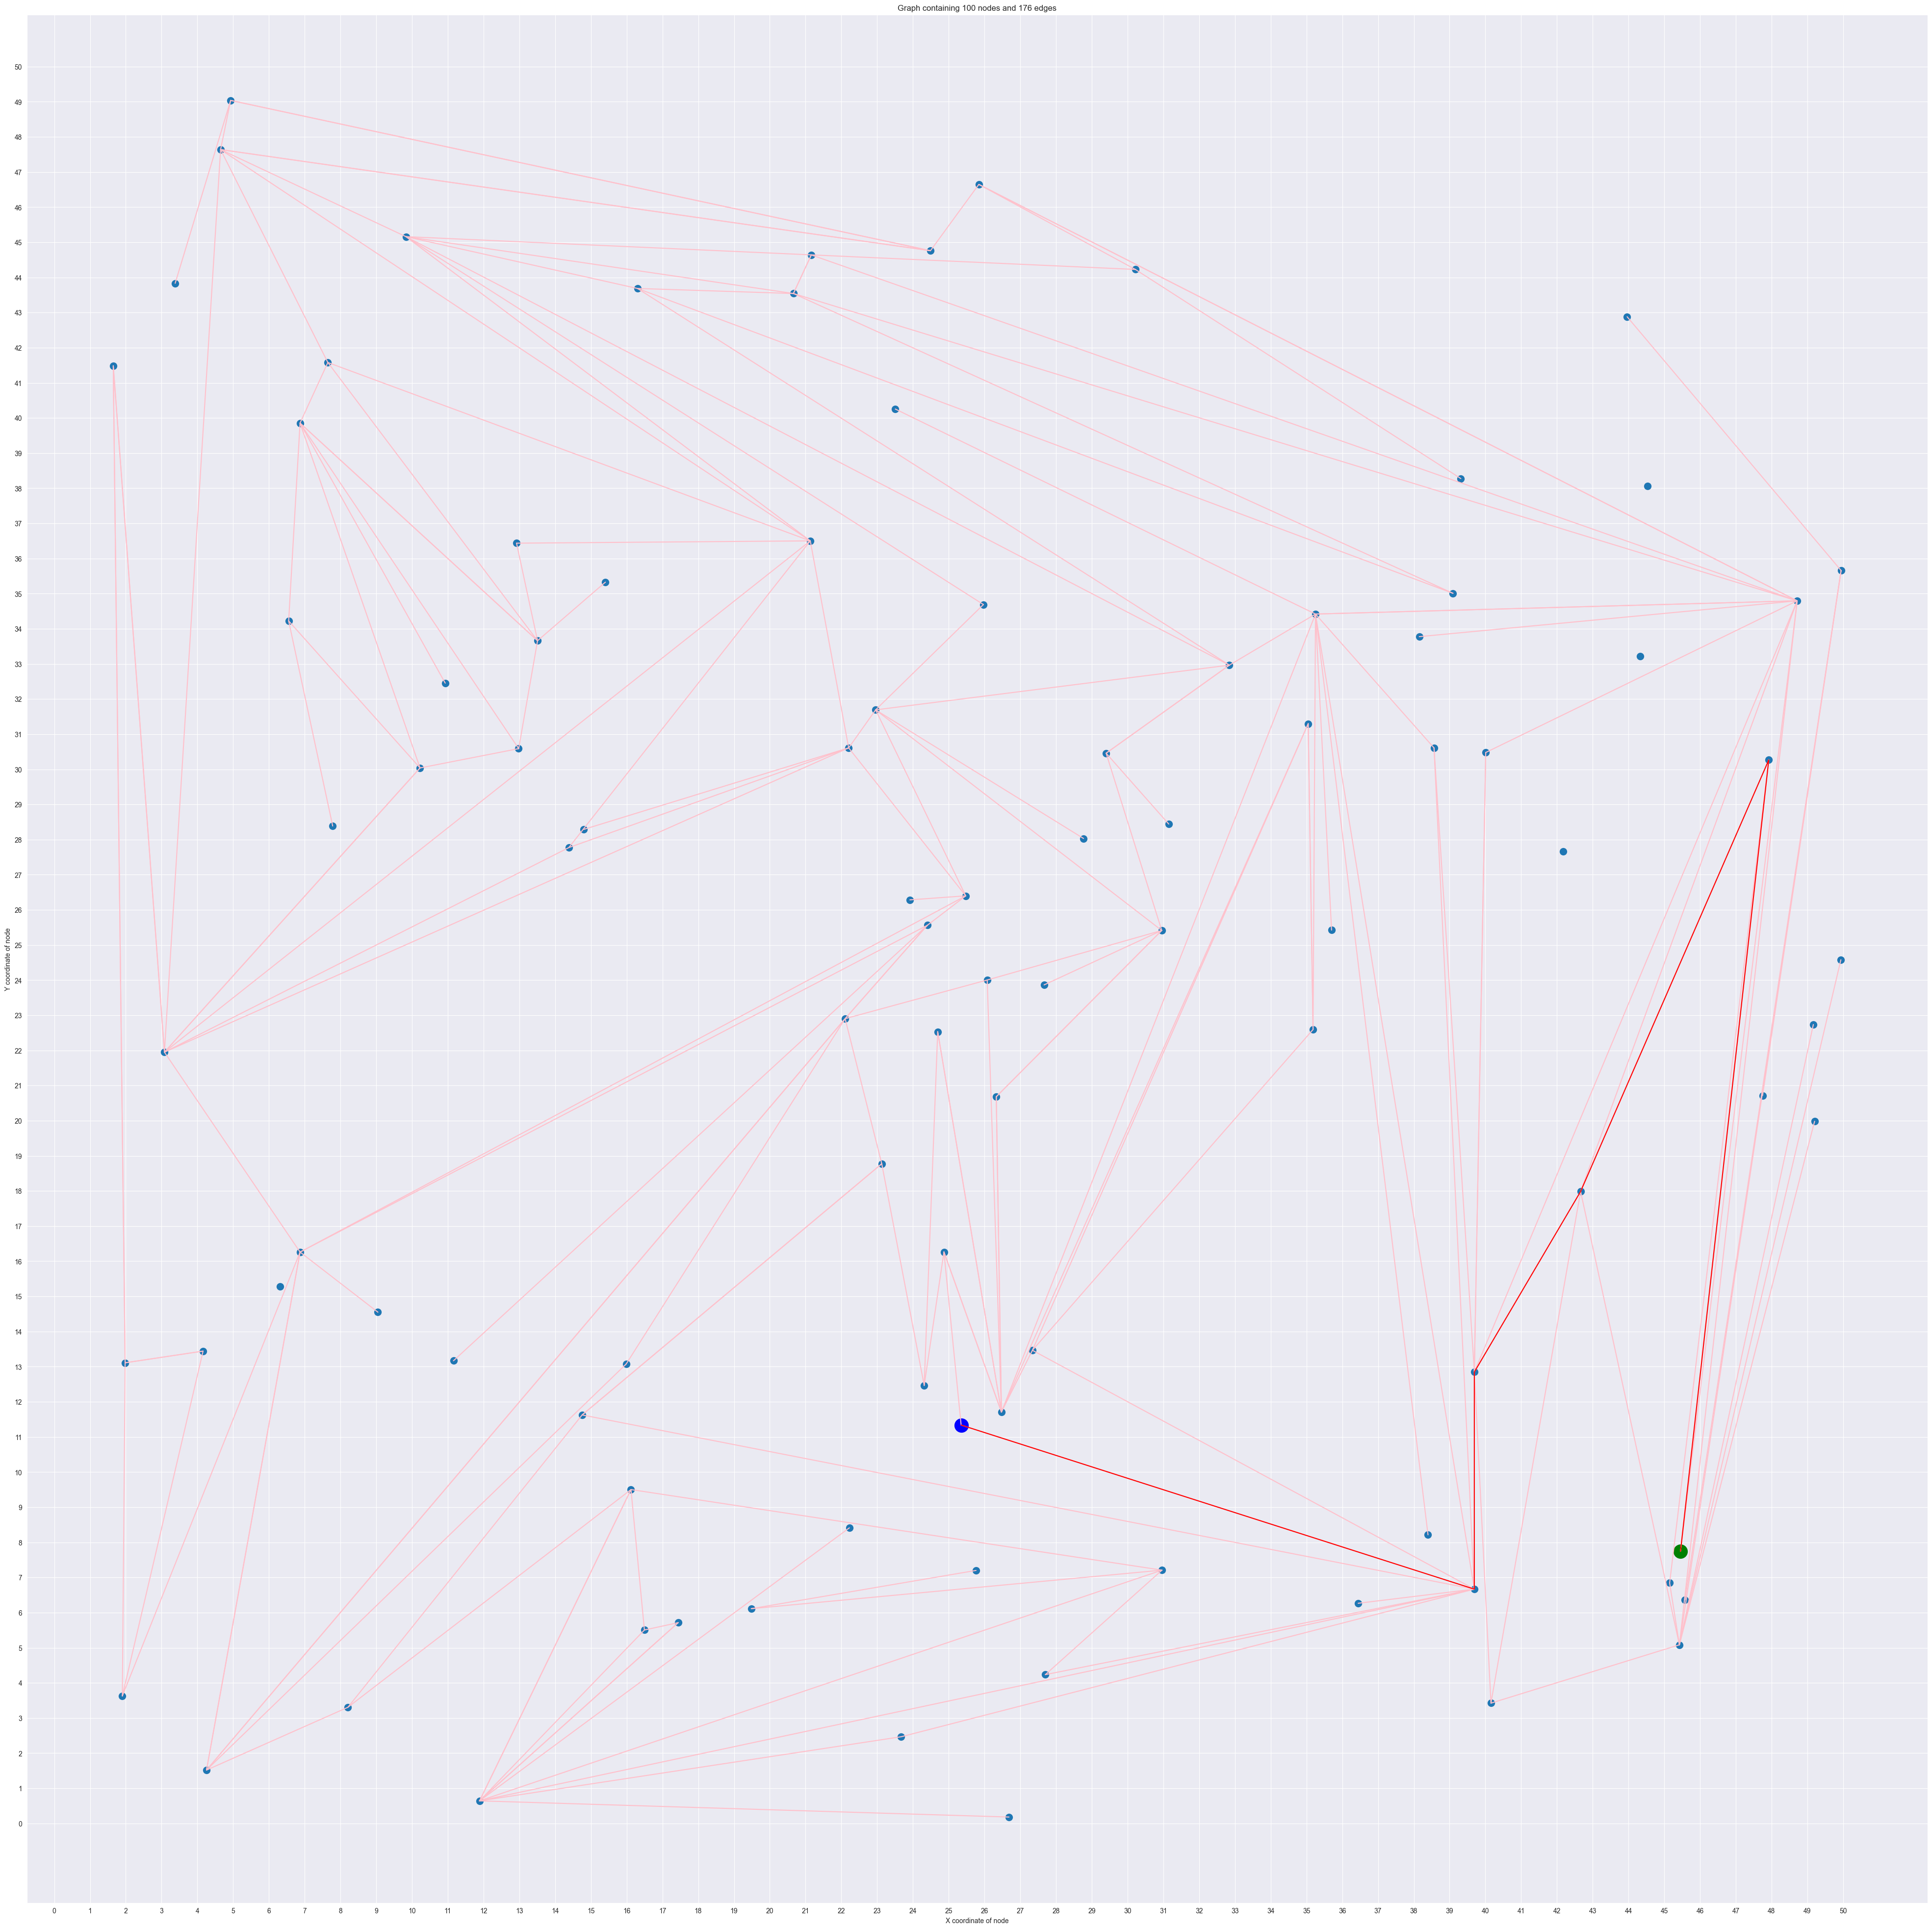

In [282]:
all_nodes, all_edges = G.get_nodes(), G.get_edges()

# Plotting Nodes
plt.figure(figsize=(50, 50))
plt.title(f"Graph containing {len(all_nodes)} nodes and {len(all_edges)} edges")
plt.xticks([i for i in range(LX, HX+1)])
plt.yticks([j for j in range(LY, HY+1)])
plt.xlabel("X coordinate of node")
plt.ylabel("Y coordinate of node")
plt.scatter([node[0] for node in all_nodes], [node[1] for node in all_nodes], s=100)

# Plotting edges
for u, v, _ in all_edges:
    plt.plot([u[0], v[0]], [u[1], v[1]], c='pink')
    
# print path
plt.plot([x for x, _ in path], [y for _, y in path], c='red')

# Source
plt.scatter([start[0]], [start[1]], c='blue', s=400)
plt.scatter([end[0]], [end[1]], c='green', s=400)

plt.show()
